# Set up environment

In [ ]:
!pip install matplotlib Pillow

# Download executable

In [ ]:
!wget https://github.com/igrega348/xray_projection_render/releases/download/v1.3/xray_projection_render_linux-amd64
!chmod +x xray_projection_render_linux-amd64

# Render 3 equispaced projections of a simple object

In [3]:
from PIL import Image

In [4]:
!./xray_projection_render_linux-amd64 --input cube_w_hole.yaml --num_projections 3 --resolution 300

 100% |█████████████████████████████████████████████████| (3/3, 4 it/s)        


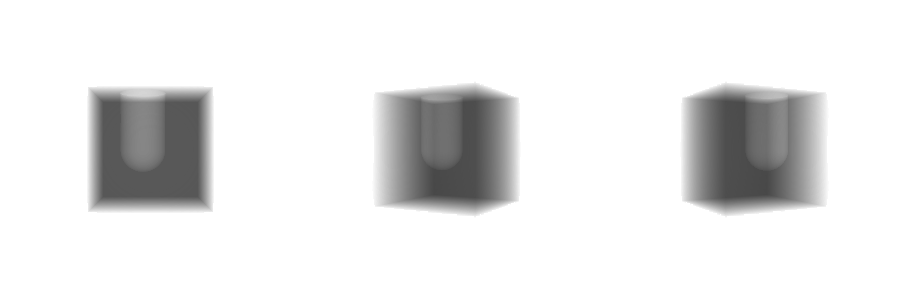

In [5]:
dst = Image.new('L', (3*300, 300))
dst.paste(Image.open('./images/image_000.png'), (0, 0))
dst.paste(Image.open('./images/image_001.png'), (300, 0))
dst.paste(Image.open('./images/image_002.png'), (600, 0))
display(dst)

# Show all example objects in 3d

 100% |█████████████████████████████████████████████| (1/1, 13575 it/s)        
 100% |█████████████████████████████████████████████| (1/1, 51065 it/s)        
 100% |█████████████████████████████████████████████| (1/1, 52748 it/s)        
 100% |█████████████████████████████████████████████| (1/1, 55426 it/s)        
 100% |█████████████████████████████████████████████| (1/1, 51722 it/s)        


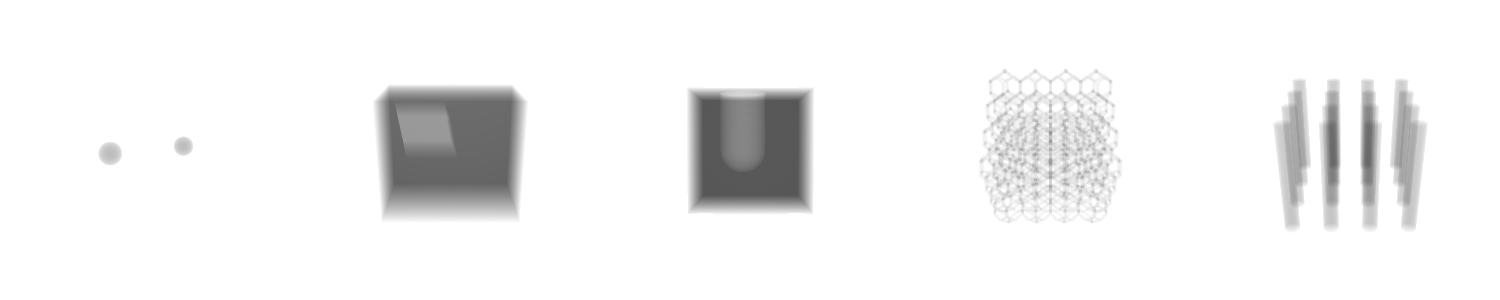

In [ ]:
objs = ['balls.json','box_w_pped.yaml','cube_w_hole.yaml','lattice.yaml','pillar_array.json']
dst = Image.new('L', (len(objs)*300, 300))
for i,obj in enumerate(objs):
    fpattern = f"{obj.split('.')[0]}_%03d.png"
    !./xray_projection_render_linux-amd64 --input {obj} --resolution 300 --fname_pattern {fpattern} --out_of_plane
    dst.paste(Image.open('./images/' + fpattern%0), (i*300, 0))
display(dst)